In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


### Exercise 1

In [2]:
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0  22 118  24   0   0   0   0   0  48  88   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  12 100 212 205 185 179 173 186 193 221 142  85   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  85  76 199 225 248 255 238 226 157  68  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  91  69  91 201 218 225 209 158  61  93  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  79  89  61  59  87 108  75  56  76  97  73   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  75  89  80  80  67  63  73  83  80  96  72   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77  88  77  80  83  83  83  83  81  95  76   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  89  96  80  83  81  84  85  85  85  97  84   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  93  97  81 

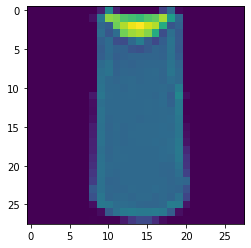

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of characters per row when printing
np.set_printoptions(linewidth=400)
index = 2
# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [5]:
training_images[index].shape

(28, 28)

In [6]:
training_images = training_images / 255.
test_images = test_images / 255.

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
inputs = np.array([[1.0, 2.0, 3.0, 4.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = tf.math.argmax(outputs, axis=1, output_type=tf.dtypes.int64)
print(f'class with highest probability: {prediction}')


input to softmax function: [[1. 2. 3. 4.]]
output of softmax function: [[0.0320586  0.08714432 0.23688282 0.64391426]]
sum of outputs: 1.0
class with highest probability: [3]


In [9]:
A = tf.constant([2, 20, 30, 3, 6])
tf.math.argmax(A)  # A[2] is maximum in tensor A

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [11]:
B = tf.constant([[2, 20, 30, 3, 6], 
                 [3, 11, 16, 1, 8],
                 [14, 45, 23, 5, 27]])
tf.math.argmax(B, 0)

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 2, 0, 2, 2])>

In [12]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4986 - accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3769 - accuracy: 0.8627
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8907


In [13]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3589 - accuracy: 0.8737


[0.35890069603919983, 0.8737000226974487]

In [16]:
test_images.shape

(10000, 28, 28)

In [18]:
classifications = model.predict(test_images)
print(classifications[0])

[9.4376020e-07 3.5167890e-08 8.0297987e-08 3.4605609e-09 2.0173125e-06 2.4043938e-02 3.4459393e-07 1.5756167e-02 7.9127123e-05 9.6011740e-01]


In [ ]:
# sum(classifications[0])

In [19]:
print(test_labels[0])

9


In [21]:
# classifications[0].max() # value
tf.argmax(classifications[0]) # position

<tf.Tensor: shape=(), dtype=int64, numpy=9>

### Exercise 2
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case?

In [22]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)


11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1855
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0740
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0465
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0347
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0749
[4.7501038e-11 3.6949793e-10 1.0295006e-07 1.0641460e-06 2.2327320e-12 9.3996380e-11 2.7987459e-14 9.9999797e-01 1.1993269e-08 7.6474151e-07]
7


In [26]:
classifications = model.predict(test_images[0:100, 0:28, 0:28])



In [27]:
print(classifications[0])
print(test_labels[0])

[4.7501038e-11 3.6949793e-10 1.0295006e-07 1.0641460e-06 2.2327320e-12 9.3996380e-11 2.7987459e-14 9.9999797e-01 1.1993269e-08 7.6474151e-07]
7


### Exercise 3

In [28]:
mnist =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() 

training_images = training_images / 255.
test_images = test_images / 255.

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3086
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1523
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1107
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0871
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0966
[6.9090895e-08 2.0764642e-08 3.7516236e-06 2.0553644e-03 3.2837189e-10 3.3317596e-07 4.8334183e-14 9.9793988e-01 1.8328795e-07 4.3308049e-07]
7


### Exercise 4

In [36]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1429
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1037
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0819
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0918
[4.6036895e-08 5.3594296e-10 9.0796566e-06 4.0185572e-05 4.4778490e-11 6.3110235e-07 9.9107419e-13 9.9994946e-01 8.1098030e-08 4.6651249e-07]
7


### Exercise 5:

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

Click for Answer

#### Answer There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.

In [37]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.relu)
                                    ])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3837
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3026
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3026
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3026
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 2.3026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7


### Exercise 6:
E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case?

* Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5

* Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [38]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images /255

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=15)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2565
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1139
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0783
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0583
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0446
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0282
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0225
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0187
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179
Epoch 11/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0132
Epoch 12/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0108
E

### Exercise 7:
Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

In [39]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images/255.0 # Experiment with removing this line
# test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.7503
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3470
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3308
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3329
[0.00000000e+00 9.85177279e-19 1.65408914e-04 1.83906406e-12 1.00587634e-20 3.19972288e-25 7.77678823e-35 9.99834538e-01 7.82424204e-22 2.31301392e-18]
7


### Exercise 8:
Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [41]:
from gc import callbacks
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epcoh, logs={}):
    if (logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = MyCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0
test_images = test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1865/1875 [============================>.] - ETA: 0s - loss: 0.4770 - accuracy: 0.8292
Reached 60% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4766 - accuracy: 0.8294
